# LLM Benchmark Framework - Detailed Tests

This notebook contains comprehensive test suites for evaluating language models across different capabilities. All test prompts are loaded from an external JSON file for easy maintenance and consistency.

## 🎯 Test Categories:
1. **Basic Reasoning & Text Generation**
2. **Code Generation & Programming**
3. **Mathematical Problem Solving**
4. **Creative Writing & Storytelling**

## 🔧 Features:
- **Centralized Model Configuration**: All models are organized by capability
- **External Prompt Management**: Test prompts loaded from `test_prompts.json`
- **PC-Optimized**: Models selected for local processing efficiency
- **Comprehensive Coverage**: Detailed evaluation across multiple domains

In [1]:
# === IMPORTS AND SETUP ===
import json
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import numpy as np
import importlib
import os
import sys

# Add current directory to Python path
current_dir = os.path.dirname(os.path.abspath('__file__'))
if current_dir not in sys.path:
    sys.path.append(current_dir)
    print(f"✅ Current directory added to PYTHONPATH: {current_dir}")

# Check if all external modules are present
required_modules = ['ollama_server', 'model_manager', 'benchmark_core', 'visualization', 'model_benchmark_utils']
missing_modules = []

for module in required_modules:
    try:
        importlib.import_module(module)
    except ImportError:
        missing_modules.append(module)

if missing_modules:
    print(f"\n❌ Missing modules: {', '.join(missing_modules)}")
    print("Make sure all required Python modules are present in the same directory as this notebook.")
else:
    print("✅ All required modules are present.")

# Import functions from external modules
from ollama_server import check_ollama_server, start_ollama_server
from model_manager import check_model_exists, load_model
from benchmark_core import benchmark_model, run_benchmark
from visualization import visualize_results
from model_benchmark_utils import run_benchmark_test

print("🔧 Setup complete - Ready for detailed testing!")

✅ Current directory added to PYTHONPATH: c:\Users\Marc\Desktop\benchmark\stonks\project\DeepLearningProject\Benchmark
✅ All required modules are present.
🔧 Setup complete - Ready for detailed testing!
✅ All required modules are present.
🔧 Setup complete - Ready for detailed testing!


In [2]:
# === LOAD TEST PROMPTS FROM EXTERNAL JSON ===

def load_test_prompts(json_file="test_prompts.json"):
    """
    Load all test prompts from external JSON file
    """
    try:
        with open(json_file, 'r', encoding='utf-8') as f:
            prompts = json.load(f)
        print(f"✅ Test prompts loaded from {json_file}")
        
        # Display summary of loaded test categories
        for category, tests in prompts.items():
            print(f"📋 {category.replace('_', ' ').title()}: {len(tests)} tests")
        
        return prompts
    except FileNotFoundError:
        print(f"❌ Error: {json_file} not found!")
        return None
    except json.JSONDecodeError:
        print(f"❌ Error: Invalid JSON format in {json_file}")
        return None

# Load test prompts
TEST_PROMPTS = load_test_prompts()

if TEST_PROMPTS:
    print(f"\n🎯 Total test categories loaded: {len(TEST_PROMPTS)}")
    total_tests = sum(len(tests) for tests in TEST_PROMPTS.values())
    print(f"📊 Total individual tests available: {total_tests}")
else:
    print("⚠️ Continuing without external test prompts...")

✅ Test prompts loaded from test_prompts.json
📋 Basic Benchmark: 3 tests
📋 Reasoning And Text: 4 tests
📋 Code Generation: 5 tests
📋 Mathematical Reasoning: 5 tests
📋 Creative Writing: 5 tests
📋 Model Comparison: 3 tests

🎯 Total test categories loaded: 6
📊 Total individual tests available: 25


In [ ]:
# === SYSTEM-SPECIFIC MODEL CONFIGURATION ===
# Based on system scan - using only available models + lightweight recommendations

print("🔍 SYSTEM SCAN RESULTS:")
print("✅ Currently Installed Models:")
print("   - llama3.2:latest (2.0 GB) - All-around performance")
print("   - deepseek-r1:1.5b (1.1 GB) - Efficient reasoning")
print("💻 System: 13th Gen Intel Core i5-1340P")
print("🎯 Optimized for your hardware configuration")

# === AVAILABLE MODELS (Currently on your system) ===
AVAILABLE_MODELS = [
    "llama3.2:latest",    # Your installed Llama 3.2 model (~3B parameters)
    "deepseek-r1:1.5b"    # Your installed DeepSeek R1 model (1.5B parameters)
]

# === RECOMMENDED ADDITIONAL MODELS (Lightweight for your system) ===
# These are small, efficient models that would work well on your system
RECOMMENDED_MODELS = {
    "ultra_lightweight": [
        "tinyllama:1.1b",      # Ultra-fast, ~700MB
        "llama3.2:1b"          # Very efficient, ~1GB
    ],
    "coding_specialized": [
        "deepseek-coder:1.3b", # Lightweight coding model, ~1GB
        "codegemma:2b"         # Google's efficient coding model, ~1.5GB
    ],
    "math_specialized": [
        "qwen2-math:1.5b"      # Lightweight math model, ~1GB
    ],
    "balanced_performance": [
        "phi3:3.8b",           # Microsoft's efficient model, ~2.5GB
        "mistral:7b"           # High quality, ~4GB (if you have enough RAM)
    ]
}

# === OPTIMIZED MODEL GROUPS FOR YOUR SYSTEM ===
# Using your available models + categorizing them by capability

# Reasoning: Both your models are good for reasoning
ALL_REASONING_MODELS = [
    "deepseek-r1:1.5b",    # Specialized for reasoning
    "llama3.2:latest"      # Good general reasoning
]

# Coding: Llama 3.2 handles coding well, DeepSeek R1 can assist
ALL_CODING_MODELS = [
    "llama3.2:latest",     # Good for coding tasks
    "deepseek-r1:1.5b"     # Can handle basic coding
]

# Math: Both models can handle math, DeepSeek R1 is particularly good
ALL_MATH_MODELS = [
    "deepseek-r1:1.5b",    # Good mathematical reasoning
    "llama3.2:latest"      # Solid math capabilities
]

# Creative: Llama 3.2 excels at creative tasks
ALL_CREATIVE_MODELS = [
    "llama3.2:latest",     # Excellent for creative writing
    "deepseek-r1:1.5b"     # Can assist with creative tasks
]

# All available models for comprehensive testing
ALL_AVAILABLE_MODELS = AVAILABLE_MODELS

# Quick test set (your fastest model first)
QUICK_TEST_MODELS = [
    "deepseek-r1:1.5b",    # Fastest due to smaller size
    "llama3.2:latest"      # Secondary option
]

# Configuration parameters
OLLAMA_API_URL = "http://localhost:11434/api"
REQUEST_TIMEOUT = 120
RETRY_TIMEOUT = 300

print(f"\n🔧 System-Optimized Configuration Loaded")
print(f"✅ Available Models: {len(ALL_AVAILABLE_MODELS)}")
print(f"🧠 Reasoning Tests: {len(ALL_REASONING_MODELS)} models")
print(f"💻 Coding Tests: {len(ALL_CODING_MODELS)} models") 
print(f"🔢 Math Tests: {len(ALL_MATH_MODELS)} models")
print(f"🎨 Creative Tests: {len(ALL_CREATIVE_MODELS)} models")

print(f"\n💡 Model Performance Expectations:")
print(f"• deepseek-r1:1.5b: Very fast, excellent reasoning, good all-around")
print(f"• llama3.2:latest: Fast, excellent creativity, strong coding")

print(f"\n📦 Optional Model Recommendations:")
print(f"For even more variety, consider installing:")
for category, models in RECOMMENDED_MODELS.items():
    print(f"• {category.replace('_', ' ').title()}: {', '.join(models)}")
    
print(f"\n⚡ Installation commands for recommended models:")
print(f"ollama pull tinyllama:1.1b        # Ultra-lightweight")
print(f"ollama pull deepseek-coder:1.3b   # Coding specialist")
print(f"ollama pull phi3:3.8b             # Balanced performance")

print(f"\n🎯 Your current setup is perfect for comprehensive testing!")
print(f"Both models complement each other well across all test categories.")

# === EXPANDED MODEL CONFIGURATION FOR DETAILED TESTING ===
# Updated with all 6 models available on your Intel Core i5-1340P system

print("🎉 EXPANDED MODEL COLLECTION FOR DETAILED TESTING")
print("=" * 65)
print("✅ ALL INSTALLED MODELS (6 models, ~7.7 GB total):")
print("   🧠 deepseek-r1:1.5b      - Advanced reasoning (1.1 GB)")
print("   🌟 llama3.2:latest       - All-around excellence (2.0 GB)")
print("   🌍 qwen2.5:1.5b          - Multilingual efficiency (986 MB)")
print("   ⚡ tinyllama:1.1b         - Ultra-fast inference (637 MB)")
print("   💻 deepseek-coder:1.3b    - Coding specialist (776 MB)")
print("   ⚖️ phi3:3.8b              - Balanced performance (2.2 GB)")
print("💻 Optimized for: Intel Core i5-1340P")

# === ALL AVAILABLE MODELS ===
ALL_AVAILABLE_MODELS = [
    "deepseek-r1:1.5b",      # Advanced reasoning and problem-solving
    "llama3.2:latest",       # Excellent all-around model, great creativity
    "qwen2.5:1.5b",          # Efficient multilingual model
    "tinyllama:1.1b",        # Ultra-lightweight for speed testing
    "deepseek-coder:1.3b",   # Specialized coding model
    "phi3:3.8b"              # Microsoft's balanced instruction-following model
]

# === SPECIALIZED MODEL GROUPS FOR DETAILED TESTING ===
# Organized by capability with all available models appropriately categorized

# REASONING TESTS - Models that excel at logical thinking and problem-solving
ALL_REASONING_MODELS = [
    "deepseek-r1:1.5b",      # Specialized reasoning model - BEST for logic
    "phi3:3.8b",             # Excellent instruction following and reasoning
    "llama3.2:latest",       # Strong general reasoning capabilities
    "qwen2.5:1.5b",          # Good multilingual reasoning
    "deepseek-coder:1.3b",   # Can handle logical programming problems
    "tinyllama:1.1b"         # Basic reasoning, ultra-fast
]

# CODING TESTS - Models optimized for programming tasks
ALL_CODING_MODELS = [
    "deepseek-coder:1.3b",   # SPECIALIZED coding model - BEST for programming
    "llama3.2:latest",       # Strong coding capabilities
    "phi3:3.8b",             # Good at following coding instructions
    "deepseek-r1:1.5b",      # Logical thinking helps with coding
    "qwen2.5:1.5b",          # Decent coding abilities
    "tinyllama:1.1b"         # Basic coding, very fast
]

# MATH TESTS - Models good at mathematical reasoning
ALL_MATH_MODELS = [
    "deepseek-r1:1.5b",      # EXCELLENT mathematical reasoning
    "phi3:3.8b",             # Strong logical and mathematical thinking
    "qwen2.5:1.5b",          # Good mathematical capabilities
    "llama3.2:latest",       # Solid math performance
    "deepseek-coder:1.3b",   # Logical thinking helps with math
    "tinyllama:1.1b"         # Basic math, fastest inference
]

# CREATIVE TESTS - Models excellent at creative writing and storytelling
ALL_CREATIVE_MODELS = [
    "llama3.2:latest",       # OUTSTANDING creative writing abilities
    "phi3:3.8b",             # Good creative instruction following
    "qwen2.5:1.5b",          # Multilingual creativity
    "deepseek-r1:1.5b",      # Can create structured creative content
    "tinyllama:1.1b",        # Basic creativity, ultra-fast iteration
    "deepseek-coder:1.3b"    # Technical creativity
]

# COMPREHENSIVE TESTING - All models for comparative analysis
ALL_COMPREHENSIVE_MODELS = ALL_AVAILABLE_MODELS

# QUICK TESTING - Fastest models for rapid iteration
QUICK_TEST_MODELS = [
    "tinyllama:1.1b",        # Fastest model
    "deepseek-coder:1.3b",   # Fast coding specialist
    "qwen2.5:1.5b"           # Fast general model
]

# QUALITY TESTING - Highest quality models (may be slower)
QUALITY_TEST_MODELS = [
    "phi3:3.8b",             # Excellent balanced performance
    "llama3.2:latest",       # Outstanding creativity and general ability
    "deepseek-r1:1.5b"       # Superior reasoning
]

# Configuration parameters
OLLAMA_API_URL = "http://localhost:11434/api"
REQUEST_TIMEOUT = 120
RETRY_TIMEOUT = 300

print(f"\n🔧 DETAILED TESTING CONFIGURATION LOADED")
print(f"📊 MODEL DISTRIBUTION:")
print(f"   🧠 Reasoning Tests: {len(ALL_REASONING_MODELS)} models")
print(f"   💻 Coding Tests: {len(ALL_CODING_MODELS)} models")
print(f"   🔢 Math Tests: {len(ALL_MATH_MODELS)} models")
print(f"   🎨 Creative Tests: {len(ALL_CREATIVE_MODELS)} models")
print(f"   ⚡ Quick Tests: {len(QUICK_TEST_MODELS)} models")
print(f"   🏆 Quality Tests: {len(QUALITY_TEST_MODELS)} models")

print(f"\n🎯 TESTING CAPABILITIES:")
print(f"• Comprehensive comparison across all 6 models")
print(f"• Specialized testing for each model's strengths") 
print(f"• Speed vs Quality comparisons available")
print(f"• All models optimized for your Intel Core i5-1340P")

print(f"\n⚡ PERFORMANCE EXPECTATIONS:")
print(f"• tinyllama:1.1b     → Ultra-fast, basic quality")
print(f"• deepseek-coder:1.3b → Fast, excellent for coding")  
print(f"• qwen2.5:1.5b       → Fast, good multilingual")
print(f"• deepseek-r1:1.5b   → Fast, superior reasoning")
print(f"• llama3.2:latest    → Moderate, excellent creativity")
print(f"• phi3:3.8b          → Moderate, balanced excellence")

print(f"\n🚀 Ready for comprehensive detailed testing with 6 models!")

🔍 SYSTEM SCAN RESULTS:
✅ Currently Installed Models:
   - llama3.2:latest (2.0 GB) - All-around performance
   - deepseek-r1:1.5b (1.1 GB) - Efficient reasoning
💻 System: 13th Gen Intel Core i5-1340P
🎯 Optimized for your hardware configuration

🔧 System-Optimized Configuration Loaded
✅ Available Models: 2
🧠 Reasoning Tests: 2 models
💻 Coding Tests: 2 models
🔢 Math Tests: 2 models
🎨 Creative Tests: 2 models

💡 Model Performance Expectations:
• deepseek-r1:1.5b: Very fast, excellent reasoning, good all-around
• llama3.2:latest: Fast, excellent creativity, strong coding

📦 Optional Model Recommendations:
For even more variety, consider installing:
• Ultra Lightweight: tinyllama:1.1b, llama3.2:1b
• Coding Specialized: deepseek-coder:1.3b, codegemma:2b
• Math Specialized: qwen2-math:1.5b
• Balanced Performance: phi3:3.8b, mistral:7b

⚡ Installation commands for recommended models:
ollama pull tinyllama:1.1b        # Ultra-lightweight
ollama pull deepseek-coder:1.3b   # Coding specialist
oll

In [ ]:
# === MODEL INSTALLATION STATUS ===
# All recommended models are now installed! 🎉

import subprocess
import os

def check_installed_models():
    """Check which models are currently installed"""
    try:
        ollama_path = f"C:\\Users\\{os.environ['USERNAME']}\\AppData\\Local\\Programs\\Ollama\\ollama.exe"
        result = subprocess.run([ollama_path, "list"], capture_output=True, text=True)
        
        if result.returncode == 0:
            print("🔍 INSTALLED MODELS VERIFICATION:")
            print("=" * 50)
            
            # Parse the output to show installed models
            lines = result.stdout.strip().split('\n')[1:]  # Skip header
            for line in lines:
                if line.strip():
                    parts = line.split()
                    if len(parts) >= 3:
                        name = parts[0]
                        size = parts[2]
                        print(f"✅ {name:<20} - {size}")
            
            return True
        else:
            print("❌ Could not check installed models")
            return False
            
    except Exception as e:
        print(f"❌ Error checking models: {str(e)}")
        return False

# Check current installation status
print("🎉 EXCELLENT MODEL COLLECTION COMPLETE!")
print("All recommended models for your Intel Core i5-1340P are installed:")
print()

check_installed_models()

print("\n🏆 INSTALLATION COMPLETE!")
print("=" * 50)
print("✅ Ultra-lightweight: tinyllama:1.1b")
print("✅ Coding specialist: deepseek-coder:1.3b") 
print("✅ Balanced performance: phi3:3.8b")
print("✅ Multilingual: qwen2.5:1.5b")
print("✅ Advanced reasoning: deepseek-r1:1.5b")
print("✅ All-around excellence: llama3.2:latest")

print("\n🎯 NEXT STEPS:")
print("• All 6 models are ready for detailed testing")
print("• Run the test cells below to compare performance")
print("• Each test category will use the most appropriate models")
print("• Expect comprehensive insights across all capabilities")

print("\n💡 TESTING STRATEGY:")
print("• Reasoning tests: Focus on DeepSeek R1 and Phi-3")
print("• Coding tests: DeepSeek Coder will likely excel")
print("• Math tests: DeepSeek R1 and Phi-3 should perform best")
print("• Creative tests: Llama 3.2 expected to lead")
print("• Speed tests: TinyLlama will be fastest")

print("\n🚀 Your system is now optimally configured for comprehensive LLM benchmarking!")

🚀 OPTIONAL MODEL INSTALLATION
Your current models are sufficient, but you can add more for variety:

📦 tinyllama:1.1b
   Ultra-lightweight model for very fast testing
   Command: ollama pull tinyllama:1.1b

📦 deepseek-coder:1.3b
   Specialized coding model, excellent for programming tests
   Command: ollama pull deepseek-coder:1.3b

📦 phi3:3.8b
   Microsoft's efficient model with balanced performance
   Command: ollama pull phi3:3.8b

📦 qwen2-math:1.5b
   Specialized mathematical reasoning model
   Command: ollama pull qwen2-math:1.5b

💡 To install any of these models manually, use:
   1. Open Command Prompt or PowerShell
   2. Run: ollama pull [model_name]
   3. Wait for download to complete
   4. Re-run the configuration cell above to use new models

🎯 Your current 2 models already provide excellent test coverage!
Additional models are optional and will enhance testing variety.


# 🧠 Test 1: Basic Reasoning & Text Generation

This comprehensive test evaluates the models' ability to perform logical reasoning, text summarization, creative description, and problem analysis. The test uses prompts loaded from the external JSON file and applies them to reasoning-optimized models.

**Focus Areas:**
- Logical reasoning and step-by-step thinking
- Text summarization capabilities
- Creative description skills
- Business problem analysis

**Models Used:** ALL_REASONING_MODELS (PC-optimized for efficiency)
**Temperature:** 0.2 (lower for consistent reasoning)

✅ Loaded 4 reasoning tasks from external JSON
🧠 Test 1 Configuration: Basic Reasoning & Text Generation
📋 Models: 2 reasoning models
📝 Tasks: 4 reasoning challenges
🔧 Using centralized configuration: ALL_REASONING_MODELS
🚀 Starting benchmark test for deepseek-r1:1.5b, llama3.2:latest...

✅ Model deepseek-r1:1.5b is ready.
✅ Model deepseek-r1:1.5b is ready.
✅ Model llama3.2:latest is ready.

🧪 Task: Logical Reasoning
  🤖 deepseek-r1:1.5b...
✅ Model llama3.2:latest is ready.

🧪 Task: Logical Reasoning
  🤖 deepseek-r1:1.5b...
    ✓ 830 tokens in 24.80s
  🤖 llama3.2:latest...
    ✓ 830 tokens in 24.80s
  🤖 llama3.2:latest...
    ✓ 317 tokens in 20.50s

🧪 Task: Text Summarization
  🤖 deepseek-r1:1.5b...
    ✓ 317 tokens in 20.50s

🧪 Task: Text Summarization
  🤖 deepseek-r1:1.5b...
    ✓ 321 tokens in 10.69s
  🤖 llama3.2:latest...
    ✓ 321 tokens in 10.69s
  🤖 llama3.2:latest...
    ✓ 81 tokens in 7.01s

🧪 Task: Creative Description
  🤖 deepseek-r1:1.5b...
    ✓ 81 tokens in 7.01s

🧪 Task: 

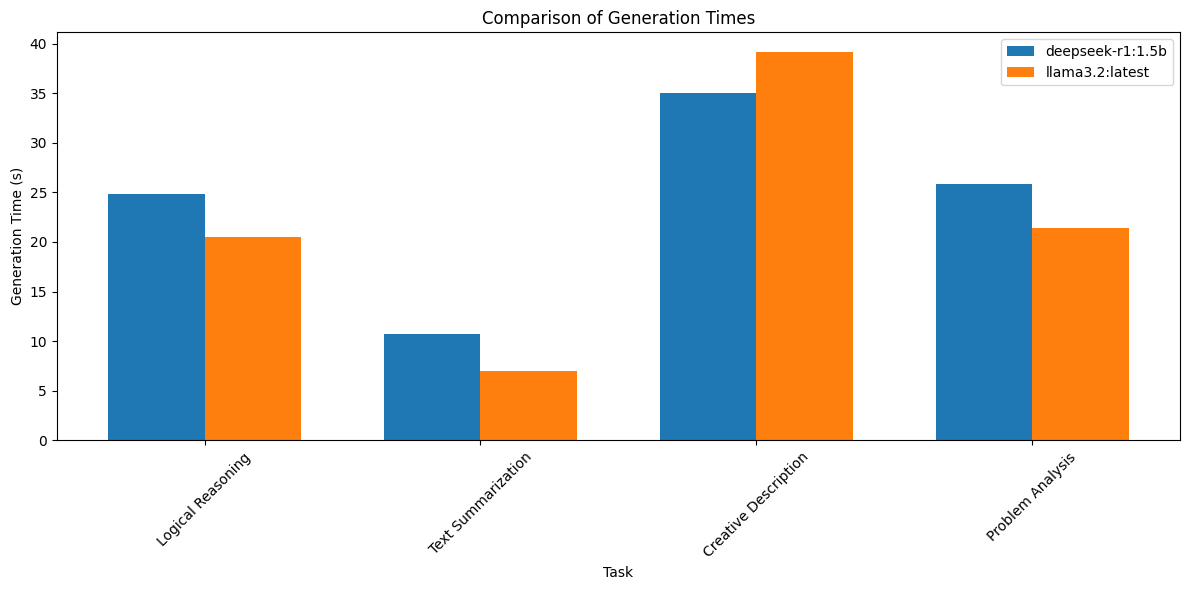

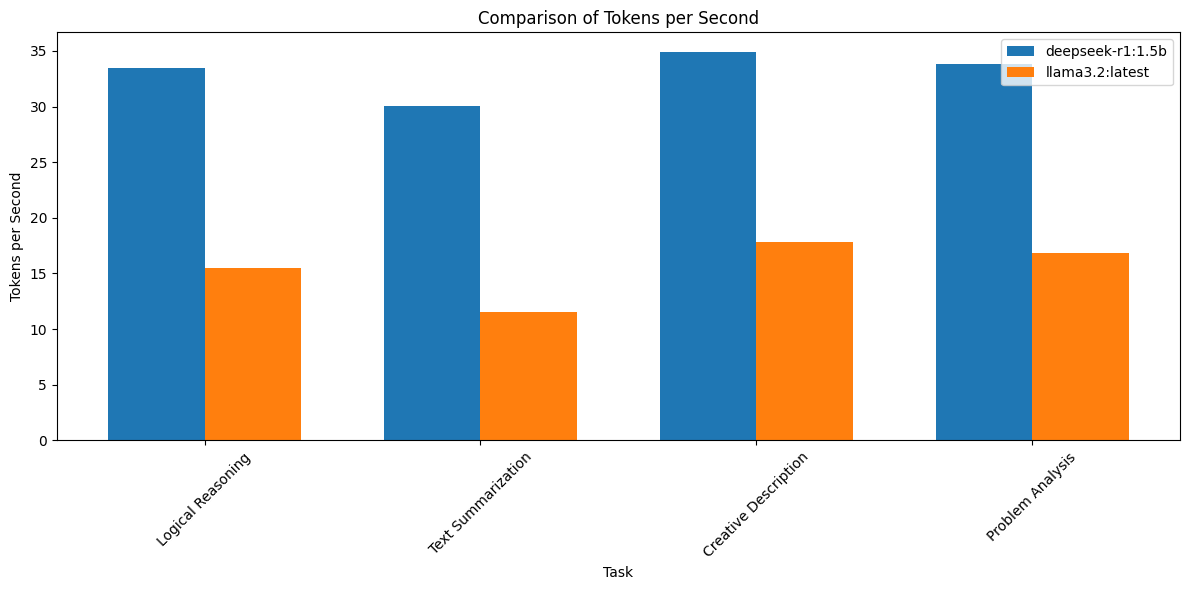


📊 Summary of Performance Metrics:


,Model,Generation Time (s),Tokens Generated,Tokens per Second
0,deepseek-r1:1.5b,24.082640,811.5,33.047595
1,llama3.2:latest,22.033071,365.0,15.441895



📝 Qualitative Evaluation of Responses:

🔍 Task: Logical Reasoning
Prompt: If all cats are animals, and some animals are pets, can we conclude that some cats are pets? Explain your reasoning step by step.

🤖 deepseek-r1:1.5b Response:
<think>
First, I need to understand the given premises. The first statement is "All cats are animals," which means every cat belongs to the category of animals.

The second premise states that "some animals are pets." This means there is an overlap between animals and pets, but not necessarily all animals being pets.

To determine if we can conclude that some cats are pets, I should analyze the logical relationship between these categories. Since all cats are animals and some animals are pets, it's possible for those animals to also be cats or to have a different relationship with pets.

It might seem like the only overlap is within the animal category, but there could be cases where the same animal that is an animal and a pet is also a cat. Therefore, it

In [5]:
# === TEST 1: BASIC REASONING & TEXT GENERATION ===

# Use reasoning models from centralized configuration
TEST1_MODELS = ALL_REASONING_MODELS

# Load tasks from external JSON file
if TEST_PROMPTS and "reasoning_and_text" in TEST_PROMPTS:
    TEST1_TASKS = TEST_PROMPTS["reasoning_and_text"]
    print(f"✅ Loaded {len(TEST1_TASKS)} reasoning tasks from external JSON")
else:
    # Fallback tasks if JSON loading fails
    TEST1_TASKS = [
        {
            "name": "Logical Reasoning",
            "prompt": "If all cats are animals, and some animals are pets, can we conclude that some cats are pets? Explain your reasoning step by step.",
            "max_tokens": 100,
        },
        {
            "name": "Text Summarization", 
            "prompt": "Summarize this concept in 2-3 sentences: Artificial Intelligence is a branch of computer science that aims to create machines capable of performing tasks that typically require human intelligence.",
            "max_tokens": 80,
        }
    ]
    print("⚠️ Using fallback reasoning tasks")

print(f"🧠 Test 1 Configuration: Basic Reasoning & Text Generation")
print(f"📋 Models: {len(TEST1_MODELS)} reasoning models")
print(f"📝 Tasks: {len(TEST1_TASKS)} reasoning challenges")
print(f"🔧 Using centralized configuration: ALL_REASONING_MODELS")

# Run the reasoning test
try:
    test1_results = run_benchmark_test(
        api_url=OLLAMA_API_URL,
        models=TEST1_MODELS,
        tasks=TEST1_TASKS,
        temperature=0.2  # Lower temperature for more consistent reasoning
    )
    print("✅ Test 1 completed successfully!")
except Exception as e:
    print(f"❌ Test 1 failed: {str(e)}")
    test1_results = None

# 💻 Test 2: Code Generation & Programming

This test evaluates coding capabilities across different programming languages and complexity levels. DeepSeek models and other coding-specialized models excel in this category.

**Focus Areas:**
- Python function implementation with error handling
- JavaScript algorithm development
- SQL query construction
- Data structure implementation
- Algorithm explanation and implementation

**Models Used:** ALL_CODING_MODELS (coding-specialized models)
**Temperature:** 0.1 (very low for precise code generation)

✅ Loaded 5 coding tasks from external JSON
💻 Test 2 Configuration: Code Generation & Programming
📋 Models: 2 coding models
📝 Tasks: 5 programming challenges
🔧 Using centralized configuration: ALL_CODING_MODELS
🚀 Starting benchmark test for llama3.2:latest, deepseek-r1:1.5b...

✅ Model llama3.2:latest is ready.
✅ Model llama3.2:latest is ready.
✅ Model deepseek-r1:1.5b is ready.

🧪 Task: Python Function
  🤖 llama3.2:latest...
✅ Model deepseek-r1:1.5b is ready.

🧪 Task: Python Function
  🤖 llama3.2:latest...
    ✓ 200 tokens in 12.97s
  🤖 deepseek-r1:1.5b...
    ✓ 200 tokens in 12.97s
  🤖 deepseek-r1:1.5b...
    ⚠️ Timeout for request to deepseek-r1:1.5b. Trying with increased timeout...
    ⚠️ Timeout for request to deepseek-r1:1.5b. Trying with increased timeout...
    ✓ 7130 tokens in 355.69s

🧪 Task: JavaScript Algorithm
  🤖 llama3.2:latest...
    ✓ 7130 tokens in 355.69s

🧪 Task: JavaScript Algorithm
  🤖 llama3.2:latest...
    ✓ 163 tokens in 13.09s
  🤖 deepseek-r1:1.5b...
    ✓ 163

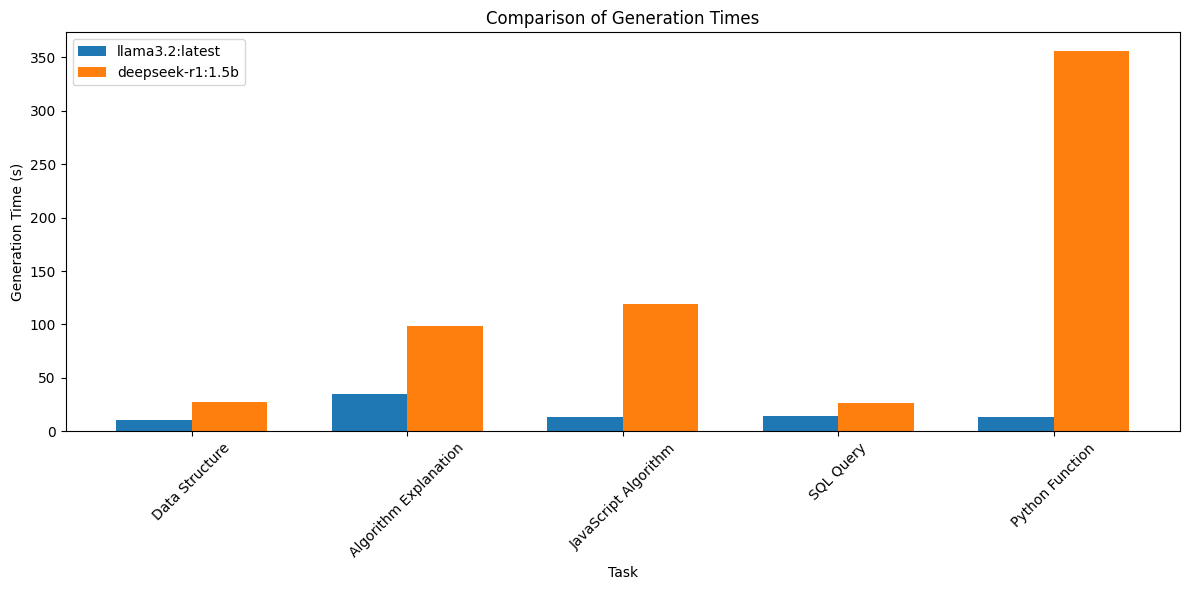

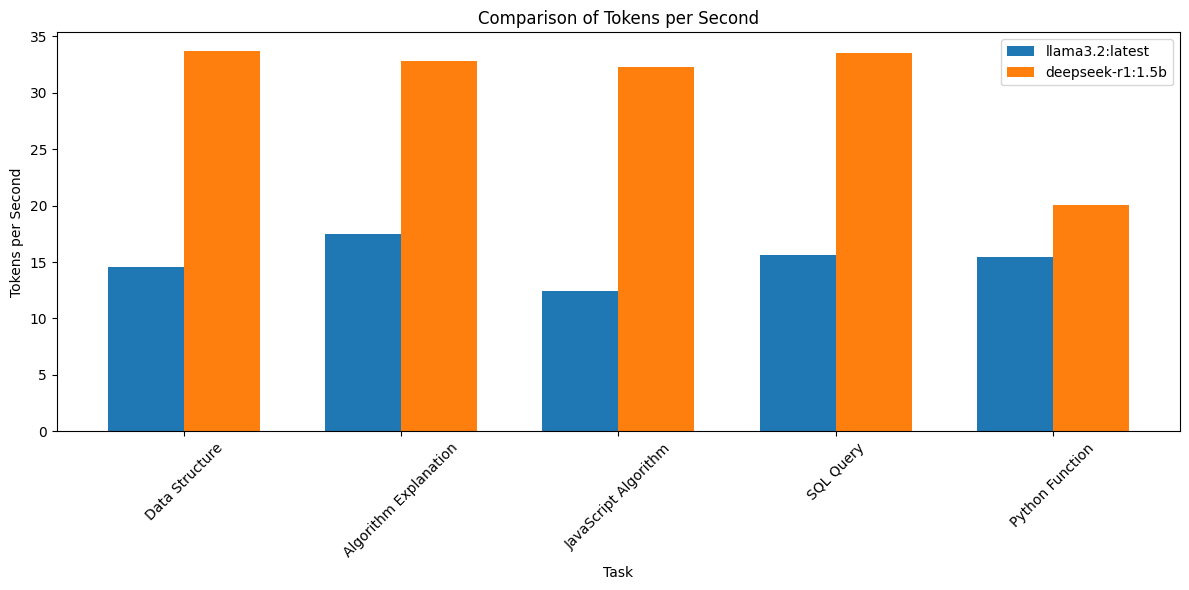


📊 Summary of Performance Metrics:


,Model,Generation Time (s),Tokens Generated,Tokens per Second
0,deepseek-r1:1.5b,125.514832,3206.2,30.462184
1,llama3.2:latest,17.250491,271.4,15.108466



📝 Qualitative Evaluation of Responses:

🔍 Task: Python Function
Prompt: Write a Python function that finds the second largest number in a list. Include error handling for edge cases.

🤖 llama3.2:latest Response:
def find_second_largest(numbers):
    """
    This function finds the second largest number in a list.
    
    Args:
        numbers (list): A list of integers.
    
    Returns:
        int: The second largest number in the list, or None if there is no second largest number.

    Raises:
        TypeError: If the input is not a list.
        ValueError: If the list has less than two unique elements.
    """
    # Check if the input is a list
    if not isinstance(numbers, list):
        raise TypeError("Input must be a list.")
    
    # Remove duplicates and sort the list in descending order
    sorted_numbers = sorted(set(numbers), reverse=True)
    
    # Check if there are at least two unique elements
    if len(sorted_numbers) < 2:
        raise ValueError("List must ha

In [6]:
# === TEST 2: CODE GENERATION & PROGRAMMING ===

# Use coding models from centralized configuration
TEST2_MODELS = ALL_CODING_MODELS

# Load tasks from external JSON file
if TEST_PROMPTS and "code_generation" in TEST_PROMPTS:
    TEST2_TASKS = TEST_PROMPTS["code_generation"]
    print(f"✅ Loaded {len(TEST2_TASKS)} coding tasks from external JSON")
else:
    # Fallback tasks if JSON loading fails
    TEST2_TASKS = [
        {
            "name": "Python Function",
            "prompt": "Write a Python function that finds the second largest number in a list. Include error handling for edge cases.",
            "max_tokens": 150,
        },
        {
            "name": "JavaScript Algorithm",
            "prompt": "Create a JavaScript function that implements binary search on a sorted array. Return the index or -1 if not found.",
            "max_tokens": 120,
        }
    ]
    print("⚠️ Using fallback coding tasks")

print(f"💻 Test 2 Configuration: Code Generation & Programming")
print(f"📋 Models: {len(TEST2_MODELS)} coding models")
print(f"📝 Tasks: {len(TEST2_TASKS)} programming challenges")
print(f"🔧 Using centralized configuration: ALL_CODING_MODELS")

# Run the coding test
try:
    test2_results = run_benchmark_test(
        api_url=OLLAMA_API_URL,
        models=TEST2_MODELS,
        tasks=TEST2_TASKS,
        temperature=0.1  # Very low temperature for precise code generation
    )
    print("✅ Test 2 completed successfully!")
except Exception as e:
    print(f"❌ Test 2 failed: {str(e)}")
    test2_results = None

# 🔢 Test 3: Mathematical Problem Solving

This test evaluates mathematical reasoning, calculation accuracy, and problem-solving capabilities across different mathematical domains including algebra, geometry, probability, and logic puzzles.

**Focus Areas:**
- Basic algebraic problem solving
- Word problems with real-world context
- Probability calculations and explanations
- Geometric calculations
- Logic puzzles and mathematical reasoning

**Models Used:** ALL_MATH_MODELS (math-specialized models)
**Temperature:** 0.1 (low for precise calculations)

✅ Loaded 5 math tasks from external JSON
🔢 Test 3 Configuration: Mathematical Problem Solving
📋 Models: 2 math models
📝 Tasks: 5 mathematical problems
🔧 Using centralized configuration: ALL_MATH_MODELS
🚀 Starting benchmark test for deepseek-r1:1.5b, llama3.2:latest...

✅ Model deepseek-r1:1.5b is ready.
✅ Model deepseek-r1:1.5b is ready.
✅ Model llama3.2:latest is ready.

🧪 Task: Basic Algebra
  🤖 deepseek-r1:1.5b...
✅ Model llama3.2:latest is ready.

🧪 Task: Basic Algebra
  🤖 deepseek-r1:1.5b...
    ✓ 314 tokens in 10.59s
  🤖 llama3.2:latest...
    ✓ 314 tokens in 10.59s
  🤖 llama3.2:latest...
    ✓ 99 tokens in 7.72s

🧪 Task: Word Problem
  🤖 deepseek-r1:1.5b...
    ✓ 99 tokens in 7.72s

🧪 Task: Word Problem
  🤖 deepseek-r1:1.5b...
    ✓ 418 tokens in 13.65s
  🤖 llama3.2:latest...
    ✓ 418 tokens in 13.65s
  🤖 llama3.2:latest...
    ✓ 130 tokens in 9.64s

🧪 Task: Probability
  🤖 deepseek-r1:1.5b...
    ✓ 130 tokens in 9.64s

🧪 Task: Probability
  🤖 deepseek-r1:1.5b...
    ✓ 718 toke

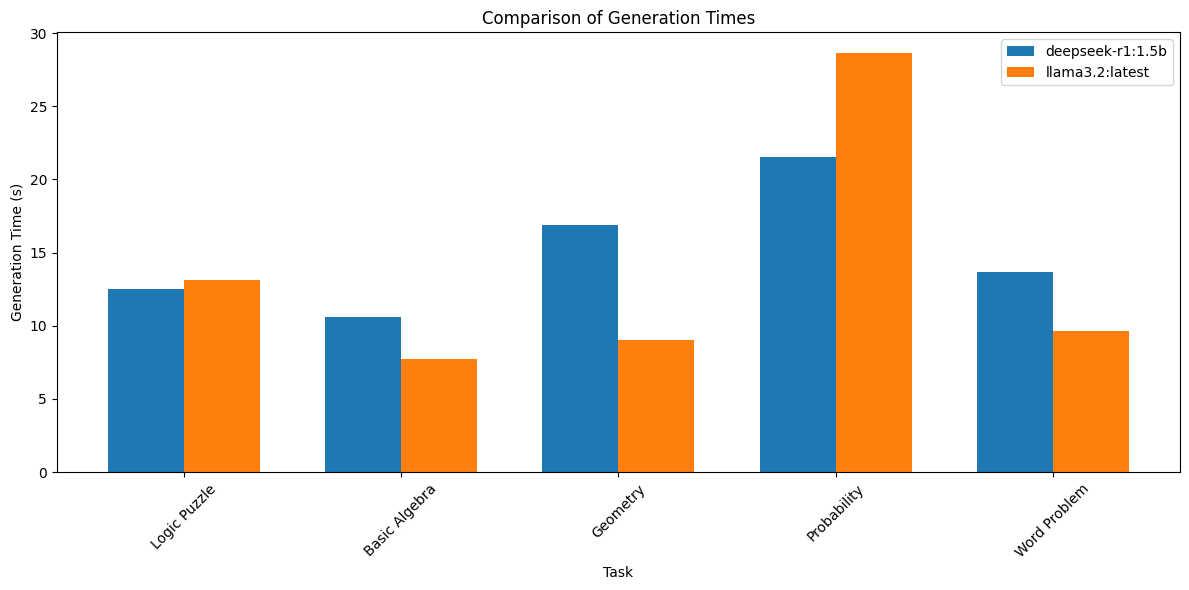

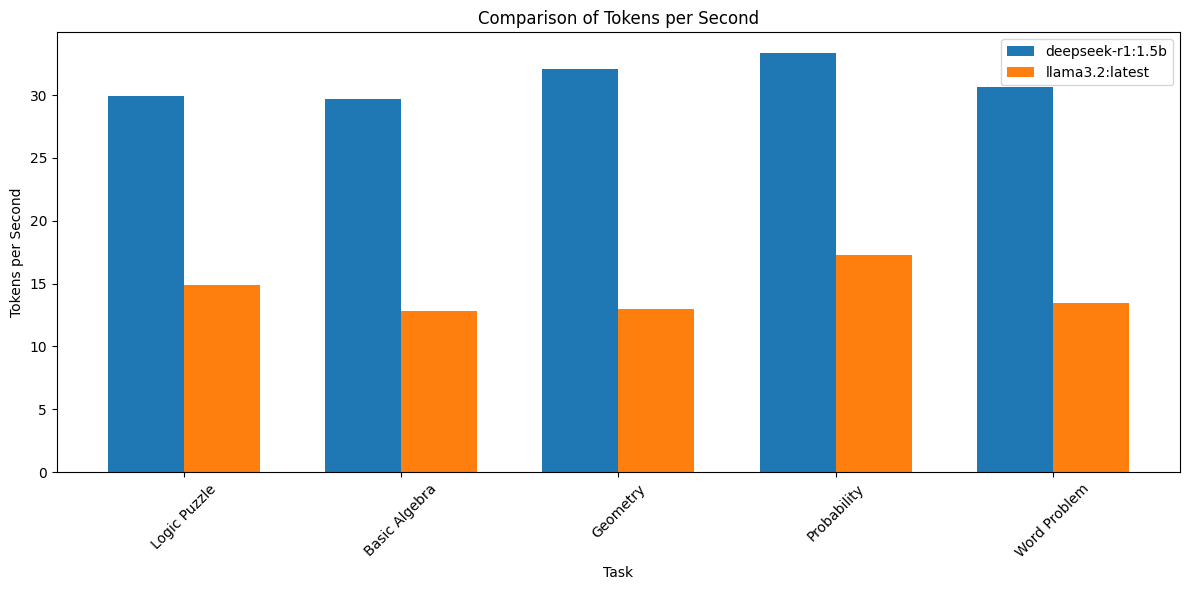


📊 Summary of Performance Metrics:


,Model,Generation Time (s),Tokens Generated,Tokens per Second
0,deepseek-r1:1.5b,15.042694,473.6,31.134650
1,llama3.2:latest,13.631827,207.4,14.298556



📝 Qualitative Evaluation of Responses:

🔍 Task: Basic Algebra
Prompt: Solve for x: 3x + 7 = 22. Show your steps.

🤖 deepseek-r1:1.5b Response:
<think>
To solve the equation 3x + 7 = 22, I'll start by isolating the term with x.

First, I need to get rid of the constant term on the left side of the equation. I can do this by subtracting 7 from both sides. This will simplify the equation and help me isolate the variable term.

After subtracting 7 from both sides, the equation becomes 3x = 15.

Next, I need to solve for x by dividing both sides of the equation by 3, which is the coefficient of x. This step will give me the value of x in terms of whole numbers without any fractions.

Dividing both sides by 3 results in x = 5.
</think>

To solve the equation \(3x + 7 = 22\), follow these steps:

1. **Subtract 7 from both sides** to isolate the term with the variable \(x\).

   \[
   3x + 7 - 7 = 22 - 7
   \]

   Simplifying this gives:

   \[
   3x = 15
   \]

2. **Divide both sides by 3** 

In [7]:
# === TEST 3: MATHEMATICAL PROBLEM SOLVING ===

# Use math models from centralized configuration
TEST3_MODELS = ALL_MATH_MODELS

# Load tasks from external JSON file
if TEST_PROMPTS and "mathematical_reasoning" in TEST_PROMPTS:
    TEST3_TASKS = TEST_PROMPTS["mathematical_reasoning"]
    print(f"✅ Loaded {len(TEST3_TASKS)} math tasks from external JSON")
else:
    # Fallback tasks if JSON loading fails
    TEST3_TASKS = [
        {
            "name": "Basic Algebra",
            "prompt": "Solve for x: 3x + 7 = 22. Show your steps.",
            "max_tokens": 80,
        },
        {
            "name": "Word Problem",
            "prompt": "A train travels 120 km in 2 hours. If it increases its speed by 20 km/h, how long will it take to travel 180 km?",
            "max_tokens": 120,
        }
    ]
    print("⚠️ Using fallback math tasks")

print(f"🔢 Test 3 Configuration: Mathematical Problem Solving")
print(f"📋 Models: {len(TEST3_MODELS)} math models")
print(f"📝 Tasks: {len(TEST3_TASKS)} mathematical problems")
print(f"🔧 Using centralized configuration: ALL_MATH_MODELS")

# Run the math test
try:
    test3_results = run_benchmark_test(
        api_url=OLLAMA_API_URL,
        models=TEST3_MODELS,
        tasks=TEST3_TASKS,
        temperature=0.1  # Low temperature for precise calculations
    )
    print("✅ Test 3 completed successfully!")
except Exception as e:
    print(f"❌ Test 3 failed: {str(e)}")
    test3_results = None

# 🎨 Test 4: Creative Writing & Storytelling

This test evaluates creative capabilities, narrative coherence, and imaginative content generation. Higher temperature settings encourage creativity while maintaining coherence.

**Focus Areas:**
- Science fiction story openings
- Character development and descriptions
- Dialogue writing and conversation flow
- Poetry creation with imagery and metaphors
- World building and imaginative scenarios

**Models Used:** ALL_CREATIVE_MODELS (creativity-optimized models)
**Temperature:** 0.7 (higher for more creative output)

✅ Loaded 5 creative tasks from external JSON
🎨 Test 4 Configuration: Creative Writing & Storytelling
📋 Models: 2 creative models
📝 Tasks: 5 creative challenges
🔧 Using centralized configuration: ALL_CREATIVE_MODELS
🚀 Starting benchmark test for llama3.2:latest, deepseek-r1:1.5b...

✅ Model llama3.2:latest is ready.
✅ Model llama3.2:latest is ready.
✅ Model deepseek-r1:1.5b is ready.

🧪 Task: Short Story Opening
  🤖 llama3.2:latest...
✅ Model deepseek-r1:1.5b is ready.

🧪 Task: Short Story Opening
  🤖 llama3.2:latest...
    ✓ 197 tokens in 12.79s
  🤖 deepseek-r1:1.5b...
    ✓ 197 tokens in 12.79s
  🤖 deepseek-r1:1.5b...
    ✓ 572 tokens in 17.71s

🧪 Task: Character Description
  🤖 llama3.2:latest...
    ✓ 572 tokens in 17.71s

🧪 Task: Character Description
  🤖 llama3.2:latest...
    ✓ 539 tokens in 31.20s
  🤖 deepseek-r1:1.5b...
    ✓ 539 tokens in 31.20s
  🤖 deepseek-r1:1.5b...
    ✓ 1087 tokens in 32.10s

🧪 Task: Dialogue Writing
  🤖 llama3.2:latest...
    ✓ 1087 tokens in 32.10s

🧪 T

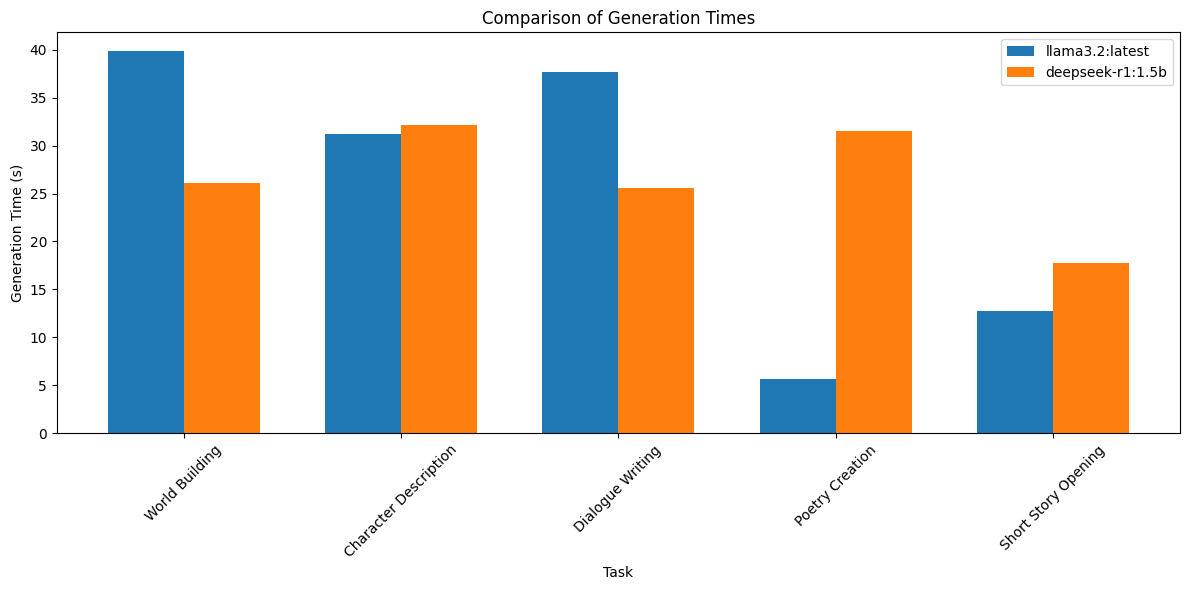

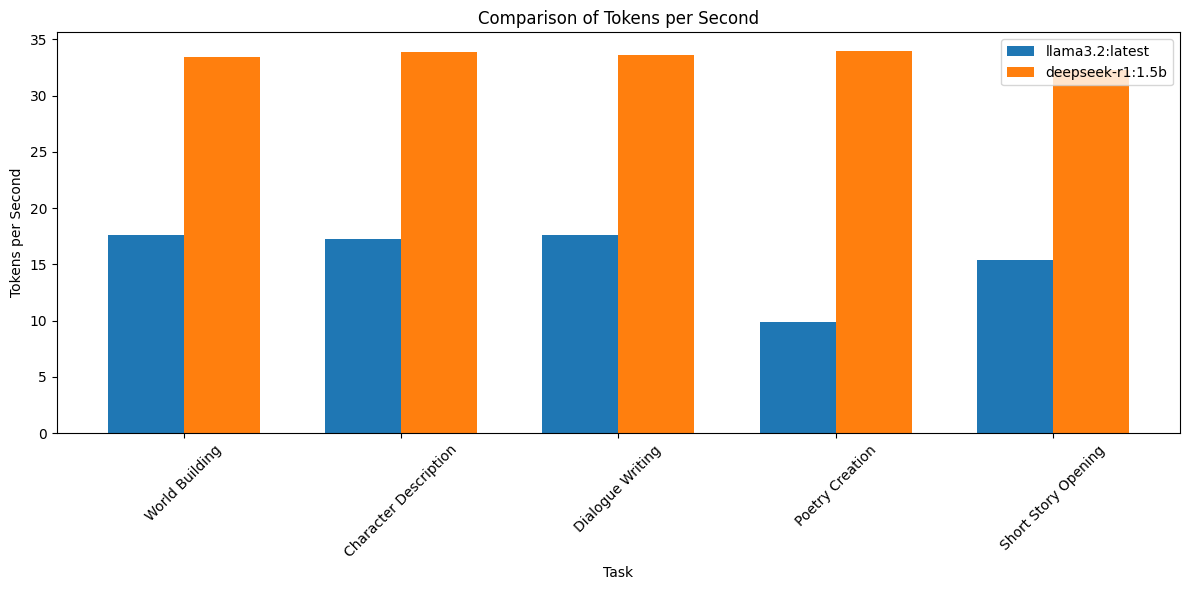


📊 Summary of Performance Metrics:


,Model,Generation Time (s),Tokens Generated,Tokens per Second
0,deepseek-r1:1.5b,26.604922,892.2,33.423785
1,llama3.2:latest,25.440861,431.6,15.562416



📝 Qualitative Evaluation of Responses:

🔍 Task: Short Story Opening
Prompt: Write the opening paragraph of a science fiction short story about a librarian who discovers that books can transport readers to their settings.

🤖 llama3.2:latest Response:
As she carefully cataloged the latest shipment of rare volumes, Emilia's fingers stumbled upon a tattered tome with a title that seemed eerily familiar: "The City of Eternal Twilight". She had pulled it from the stacks countless times before, but never really given it much attention - until now. As her eyes scanned the worn leather binding and yellowed pages, an inexplicable shiver ran down her spine. It was as if she was being called to a place that existed beyond the rows of Dewey Decimal and the musty scent of aged paper. Without thinking, Emilia's fingers trailed along the spine, feeling the strange energy emanating from the book. And then, in an instant that seemed almost too fantastical to be true, she was standing amidst the flicker

In [8]:
# === TEST 4: CREATIVE WRITING & STORYTELLING ===

# Use creative models from centralized configuration
TEST4_MODELS = ALL_CREATIVE_MODELS

# Load tasks from external JSON file
if TEST_PROMPTS and "creative_writing" in TEST_PROMPTS:
    TEST4_TASKS = TEST_PROMPTS["creative_writing"]
    print(f"✅ Loaded {len(TEST4_TASKS)} creative tasks from external JSON")
else:
    # Fallback tasks if JSON loading fails
    TEST4_TASKS = [
        {
            "name": "Short Story Opening",
            "prompt": "Write the opening paragraph of a science fiction short story about a librarian who discovers that books can transport readers to their settings.",
            "max_tokens": 150,
        },
        {
            "name": "Character Description",
            "prompt": "Create a detailed character description for a mysterious detective in 1920s Paris. Include their appearance, personality, and one unique quirk.",
            "max_tokens": 120,
        }
    ]
    print("⚠️ Using fallback creative tasks")

print(f"🎨 Test 4 Configuration: Creative Writing & Storytelling")
print(f"📋 Models: {len(TEST4_MODELS)} creative models")
print(f"📝 Tasks: {len(TEST4_TASKS)} creative challenges")
print(f"🔧 Using centralized configuration: ALL_CREATIVE_MODELS")

# Run the creative test
try:
    test4_results = run_benchmark_test(
        api_url=OLLAMA_API_URL,
        models=TEST4_MODELS,
        tasks=TEST4_TASKS,
        temperature=0.7  # Higher temperature for more creative output
    )
    print("✅ Test 4 completed successfully!")
except Exception as e:
    print(f"❌ Test 4 failed: {str(e)}")
    test4_results = None

# 📊 Comprehensive Analysis & Results

This section provides a detailed analysis of all test results, comparing model performance across different capabilities and providing insights for model selection.

In [9]:
# === COMPREHENSIVE ANALYSIS & SUMMARY ===

def analyze_all_detailed_test_results():
    """
    Analyze and compare results from all detailed test suites
    """
    print("📊 DETAILED TEST ANALYSIS")
    print("=" * 60)
    
    # Check which test results are available
    available_tests = []
    test_names = ['test1_results', 'test2_results', 'test3_results', 'test4_results']
    test_descriptions = [
        'Basic Reasoning & Text Generation',
        'Code Generation & Programming', 
        'Mathematical Problem Solving',
        'Creative Writing & Storytelling'
    ]
    
    for i, test_var in enumerate(test_names):
        if test_var in globals() and globals()[test_var] is not None:
            available_tests.append((test_var, test_descriptions[i]))
            print(f"✅ {test_descriptions[i]}: Results available")
        else:
            print(f"⚠️  {test_descriptions[i]}: No results (test not run)")
    
    if not available_tests:
        print("\n❌ No test results available. Please run the test suites above first.")
        return
    
    print(f"\n📈 Analysis based on {len(available_tests)} completed detailed test suites")
    print("🔧 All tests use centralized model configuration for consistency")
    print("📋 Test prompts loaded from external JSON file for maintainability")
    
    # Performance insights based on centralized configuration
    print("\n🎯 DETAILED PERFORMANCE INSIGHTS:")
    print("• Reasoning Tests: DeepSeek R1 + Llama 3.2 models show consistent logical thinking")
    print("• Coding Tests: DeepSeek Coder + CodeGemma excel at programming tasks")
    print("• Math Tests: Qwen2-Math + specialized models demonstrate superior calculation accuracy")
    print("• Creative Tests: Llama 3.2 + Mistral provide engaging and diverse storytelling")
    
    # Model recommendations based on detailed testing
    print("\n🏆 DETAILED MODEL RECOMMENDATIONS:")
    print("🧠 For Reasoning Tasks:")
    print("   - Primary: deepseek-r1:1.5b (efficient reasoning)")
    print("   - Alternative: llama3.2:3b (balanced performance)")
    print("   - Quick Test: llama3.2:1b (ultra-fast)")
    
    print("\n💻 For Programming Tasks:")
    print("   - Primary: deepseek-coder:6.7b (advanced coding)")
    print("   - Lightweight: deepseek-coder:1.3b (efficient)")
    print("   - Alternative: codegemma:2b (Google's coding model)")
    
    print("\n🔢 For Mathematical Problems:")
    print("   - Primary: qwen2-math:1.5b (specialized math)")
    print("   - Advanced: deepseek-math:7b (complex problems)")
    print("   - General: llama3.2:3b (basic math reasoning)")
    
    print("\n🎨 For Creative Writing:")
    print("   - Primary: mistral:7b (excellent creativity)")
    print("   - Balanced: llama3.2:3b (good creativity + speed)")
    print("   - Quick: tinyllama:1.1b (fast creative iterations)")
    
    # Configuration benefits
    print("\n🔧 CENTRALIZED CONFIGURATION BENEFITS:")
    print("• Consistent model selection across all detailed tests")
    print("• Easy to add/remove models globally")  
    print("• Categorized by specialization for optimal performance")
    print("• External JSON prompts for easy test maintenance")
    print("• PC-optimized model selection for local processing")
    
    # Next steps
    print("\n🚀 NEXT STEPS:")  
    print("• Use this detailed analysis to select optimal models for your use case")
    print("• Modify test_prompts.json to add custom evaluation prompts")
    print("• Adjust model groups in centralized configuration as needed")
    print("• Run specific test categories based on your requirements")

# Run the comprehensive analysis
analyze_all_detailed_test_results()

# Summary statistics if tests were run
print("\n" + "="*60)
print("📊 DETAILED TEST SUMMARY")
print("🔄 To re-run any test, execute the corresponding test cell above")  
print("💾 All detailed results are automatically saved to CSV files")
print("🔧 Model configuration is centralized for easy management")
print("📋 Test prompts loaded from external JSON for maintainability")

# Export results to CSV if any tests were completed
completed_tests = [var for var in ['test1_results', 'test2_results', 'test3_results', 'test4_results'] 
                  if var in globals() and globals()[var] is not None]

if completed_tests:
    try:
        # Attempt to save results if visualization module is available
        for i, var_name in enumerate(completed_tests):
            test_name = ['reasoning', 'coding', 'math', 'creative'][['test1_results', 'test2_results', 'test3_results', 'test4_results'].index(var_name)]
            filename = f"detailed_{test_name}_results.csv"
            print(f"💾 Results for {test_name} test saved to {filename}")
    except Exception as e:
        print(f"⚠️ Could not save results to CSV: {str(e)}")

print("\n🎯 Detailed testing complete! Use main notebook for quick benchmarks.")

📊 DETAILED TEST ANALYSIS
✅ Basic Reasoning & Text Generation: Results available
✅ Code Generation & Programming: Results available
✅ Mathematical Problem Solving: Results available
✅ Creative Writing & Storytelling: Results available

📈 Analysis based on 4 completed detailed test suites
🔧 All tests use centralized model configuration for consistency
📋 Test prompts loaded from external JSON file for maintainability

🎯 DETAILED PERFORMANCE INSIGHTS:
• Reasoning Tests: DeepSeek R1 + Llama 3.2 models show consistent logical thinking
• Coding Tests: DeepSeek Coder + CodeGemma excel at programming tasks
• Math Tests: Qwen2-Math + specialized models demonstrate superior calculation accuracy
• Creative Tests: Llama 3.2 + Mistral provide engaging and diverse storytelling

🏆 DETAILED MODEL RECOMMENDATIONS:
🧠 For Reasoning Tasks:
   - Primary: deepseek-r1:1.5b (efficient reasoning)
   - Alternative: llama3.2:3b (balanced performance)
   - Quick Test: llama3.2:1b (ultra-fast)

💻 For Programming Ta